# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

---

## A replacement for NumPy to use the power of GPUs...

In [1]:
import torch as t

# Tensors
a = t.tensor([1,2,3])
# Can specify type during construction
a = t.tensor([1,2,3], dtype=t.half)

In [2]:
# Can cast to different types once constructed
a

tensor([ 1.,  2.,  3.], dtype=torch.float16)

In [3]:
a.double()

tensor([ 1.,  2.,  3.], dtype=torch.float64)

In [4]:
a.float()

tensor([ 1.,  2.,  3.])

In [5]:
a.short()

tensor([ 1,  2,  3], dtype=torch.int16)

In [6]:
a.long()

tensor([ 1,  2,  3])

| Data type                | dtype	                       |CPU tensor	        |GPU tensor               |
|:------------------------:|:-----------------------------:|:------------------:|:-----------------------:|
| 32-bit floating point    | torch.float32 or torch.float  | torch.FloatTensor  | torch.cuda.FloatTensor  |
| 64-bit floating point    | torch.float64 or torch.double | torch.DoubleTensor | torch.cuda.DoubleTensor |
| 16-bit floating point	   | torch.float16 or torch.half   | torch.HalfTensor   | torch.cuda.HalfTensor   |
| 8-bit integer (unsigned) | torch.uint8                   | torch.ByteTensor   | torch.cuda.ByteTensor   |
| 8-bit integer (signed)   | torch.int8	                   | torch.CharTensor   | torch.cuda.CharTensor   |
| 16-bit integer (signed)  | torch.int16 or torch.short	   | torch.ShortTensor  | torch.cuda.ShortTensor  |
| 32-bit integer (signed)  | torch.int32 or torch.int	   | torch.IntTensor    | torch.cuda.IntTensor    |
| 64-bit integer (signed)  | torch.int64 or torch.long	   | torch.LongTensor   | torch.cuda.LongTensor   |


### Converting between Tensors and Numpy Arrays...
Tensor -> Numpy

In [7]:
import numpy as np

x = t.Tensor([1,2,3.])
x.type()

'torch.FloatTensor'

In [8]:
y = x.numpy()
type(y)

numpy.ndarray

However, they point to the same place in memory...

In [9]:
x

tensor([ 1.,  2.,  3.])

In [10]:
y

array([1., 2., 3.], dtype=float32)

In [11]:
x += 10
x

tensor([ 11.,  12.,  13.])

In [12]:
y

array([11., 12., 13.], dtype=float32)

Numpy -> Tensor

In [13]:
y = np.array([5,4,3])
type(y)

numpy.ndarray

In [14]:
x = t.from_numpy(y)
type(x)

torch.Tensor

In [15]:
y

array([5, 4, 3])

In [16]:
x

tensor([ 5,  4,  3])

In [17]:
y += 10
y

array([15, 14, 13])

In [18]:
x

tensor([ 15,  14,  13])

### Speed and Efficiency
Torch is faster than Numpy

In [19]:
import time
def timer(f, trials=5):
    avg_time = 0
    for i in range(trials):
        start = time.time()
        f()
        stop = time.time()
        avg_time += (stop - start)/trials
    return avg_time

In [44]:
np_arr = np.random.rand(10000,10000)
t_arr = t.rand((10000,10000))

In [21]:
print('type(t_arr) = ', type(t_arr))
print('t_arr.shape = ', t_arr.shape)

type(t_arr) =  <class 'torch.Tensor'>
t_arr.shape =  torch.Size([10000, 10000])


In [22]:
print('type(np_arr) = ', type(np_arr))
print('np_arr.shape = ', np_arr.shape)

type(np_arr) =  <class 'numpy.ndarray'>
np_arr.shape =  (10000, 10000)


In [45]:
timer(lambda: t_arr*t_arr)

0.08294696807861328

In [24]:
timer(lambda: np_arr*np_arr)

0.47489461898803714

What about optimizing with some class methods?

In [25]:
def exp1():
    y = t_arr * t_arr

In [26]:
y = t.empty(t_arr.shape)
def exp2():
    t.mul(t_arr, t_arr, out=y)

In [27]:
def exp3():
    t_arr.mul_(t_arr)

In [28]:
timer(exp1)

0.07322473526000976

In [29]:
timer(exp2)

0.043427753448486324

In [30]:
timer(exp3)

0.03172154426574707

### Tensors have 100+ built-in class methods 
including all your favorite numpy convenience methods and a a growing linear algebra library

## What about the GPU?
There is a class method call 'to()', that sends a tensor to a specific device. This is new in 0.4.0.

In [31]:
t_arr.shape

torch.Size([10000, 10000])

In [57]:
t_arr.device # Should currently be on the cpu

device(type='cpu')

In [59]:
device = t.device('cuda')
t_arr_gpu = t_arr.to(device)

In [60]:
t_arr.device

device(type='cpu')

In [61]:
t_arr_gpu.device

device(type='cuda', index=0)

In [62]:
timer(lambda: t_arr*t_arr)

0.0795548915863037

In [64]:
timer(lambda: t_arr_gpu*t_arr_gpu)

0.00011396408081054688

In [65]:
timer(lambda: np_arr*np_arr)

0.47127203941345214

In [67]:
0.47127203941345214/0.00011396408081054688

4135.26820083682

## a deep learning research platform that provides maximum flexibility and speed

Central to all neural networks in PyTorch is the autograd package. Let’s first briefly visit this, and we will then go to training our first neural network.

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

In [76]:
b = t.tensor([2], dtype=t.float32)

In [77]:
b.requires_grad

False

In [78]:
y=b*b*b
y.requires_grad

False

In [79]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [95]:
b.requires_grad = True # or b.requires_grad_()

In [101]:
y=b*b*b
y.requires_grad

True

In [102]:
z = y*y

In [103]:
z.backward()

In [107]:
y.grad_fn

In [108]:
b.grad

tensor([ 71926.9922])

In [109]:
z.grad

In [70]:
c = b.detach()

In [71]:
y=c*c

In [72]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [110]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


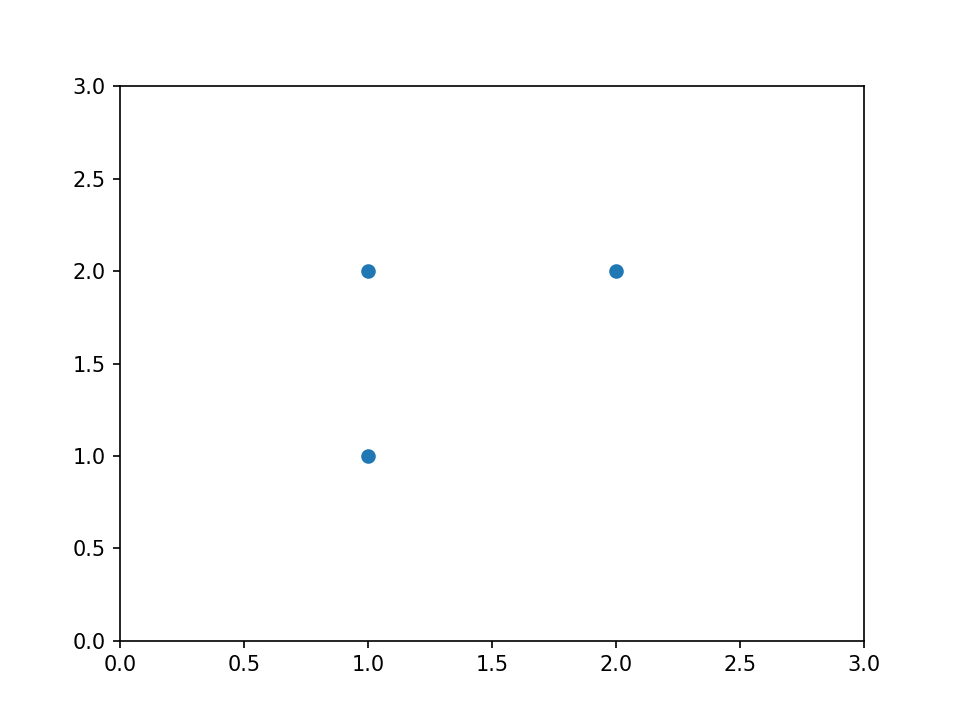

In [132]:
pts = t.tensor([(1,1),(1,2),(2,2)]).float()
plt.scatter(pts[:,0],pts[:,1]); plt.xlim(0,3); plt.ylim(0,3); plt.show()

In [146]:
params = t.tensor((1,0), requires_grad=True, dtype=t.float32)

In [148]:
diff = params[0]*pts[:,0]+params[1]-pts[:,1]
sq = (diff*diff).float()
loss = sq.mean()
loss.backward()
print(params.requires_grad)
params = params - 0.001*params.grad

True


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'